# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
sns.set_theme(style="ticks")

In [4]:
drive.mount("/drive")

Mounted at /drive


# Load the Data

Cleaned and ready-for-analysis data was prepared in data wrangling part and saved as `attempts.csv`.


In [5]:
attempts = pd.read_csv("/drive/MyDrive/attempts.csv", index_col=0)

In [6]:
attempts.head(3)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,date_registration,date_unregistration,avg_score,first_score,mean_score,last_score,score_std,min_weight_score,max_weight_score,submit_day_delta,submit_day_delta_std,num_banked,has_exam,num_of_assmnt,subpage_clicks,forumng_clicks,homepage_clicks,oucontent_clicks,ouwiki_clicks,quiz_clicks,resource_clicks,url_clicks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,0,Pass,268,-159.0,NaN,82.4,78.0,82.0,82.0,3.082207,78.0,85.0,9.0,0.83666,0.0,0.0,5.0,32.0,193.0,138.0,553.0,0.0,0.0,13.0,5.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,0,Pass,268,-53.0,NaN,65.4,70.0,66.4,60.0,4.335897,60.0,70.0,0.0,3.24037,0.0,0.0,5.0,87.0,417.0,324.0,537.0,0.0,0.0,12.0,48.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,1,Withdrawn,268,-92.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,126.0,59.0,66.0,0.0,0.0,4.0,4.0


In [7]:
attempts.shape

(32593, 35)

# Explore the Data

There are 35 columns in the data. Some are continuous, some categorical

In [8]:
attempts.describe().T

,count,mean,std,min,25%,50%,75%,max
id_student,32593.0,706687.669131,549167.313855,3733.0,508573.000000,590310.000000,644453.000000,2.716795e+06
num_of_prev_attempts,32593.0,0.163225,0.479758,0.0,0.000000,0.000000,0.000000,6.000000e+00
studied_credits,32593.0,79.758691,41.071900,30.0,60.000000,60.000000,120.000000,6.550000e+02
disability,32593.0,0.097076,0.296066,0.0,0.000000,0.000000,0.000000,1.000000e+00
module_presentation_length,32593.0,256.010125,13.179078,234.0,241.000000,262.000000,268.000000,2.690000e+02
date_registration,32548.0,-69.411300,49.260522,-322.0,-100.000000,-57.000000,-29.000000,1.670000e+02
date_unregistration,10072.0,49.757645,82.460890,-365.0,-2.000000,27.000000,109.000000,4.440000e+02
avg_score,25843.0,63.238990,25.676777,0.0,54.333333,70.000000,81.040000,1.000000e+02
first_score,25820.0,73.322851,20.949596,0.0,65.000000,77.000000,88.000000,1.000000e+02
mean_score,25820.0,72.768254,16.374997,0.0,64.666667,76.000000,84.545455,1.000000e+02


Obvisusly there is something wrong with `submit_day_delta` with a value of `-1870`.

In [9]:
attempts[attempts.submit_day_delta == -1870]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,date_registration,date_unregistration,avg_score,first_score,mean_score,last_score,score_std,min_weight_score,max_weight_score,submit_day_delta,submit_day_delta_std,num_banked,has_exam,num_of_assmnt,subpage_clicks,forumng_clicks,homepage_clicks,oucontent_clicks,ouwiki_clicks,quiz_clicks,resource_clicks,url_clicks
24162,FFF,2013J,325750,M,Scotland,HE Qualification,10-20,35-55,1,90,0,Withdrawn,268,-32.0,235.0,64.5,68.0,67.5,68.0,17.939714,24.0,95.0,-1870.0,195.029912,0.0,0.0,10.0,179.0,130.0,130.0,1036.0,25.0,2.0,26.0,12.0


So this is just one student. Let's check if there was a miscalculation. When I get back to data wrangling and check the student's each assginment some of them were more than 300 days. So there was no miscalculation.

In [10]:
# Continuous features
df_cont = attempts[['num_of_prev_attempts', 'studied_credits','module_presentation_length',
                    'date_registration', 'date_unregistration', 'avg_score',
                     'first_score', 'mean_score', 'last_score', 'score_std',
                    'min_weight_score', 'max_weight_score', 'submit_day_delta',
                    'submit_day_delta_std', 'num_banked', 'num_of_assmnt',
                    'subpage_clicks', 'forumng_clicks', 'homepage_clicks',
                    'oucontent_clicks', 'ouwiki_clicks', 'quiz_clicks',
                    'resource_clicks', 'url_clicks']]
# Categorical features
df_cat = attempts[['code_module', 'code_presentation', 'disability', 'has_exam', 
                   'gender', 'region', 'highest_education', 'imd_band', 'age_band']]

# Other Features
attempts.drop(df_cont, axis=1).drop(df_cat, axis=1)

,id_student,final_result
0,11391,Pass
1,28400,Pass
2,30268,Withdrawn
3,31604,Pass
4,32885,Pass
...,...,...
32588,2640965,Fail
32589,2645731,Distinction
32590,2648187,Pass
32591,2679821,Withdrawn


Here `final_result` is target feature. On the other hand `id_student` will be kept out.

## Continuous fetaure's distributions

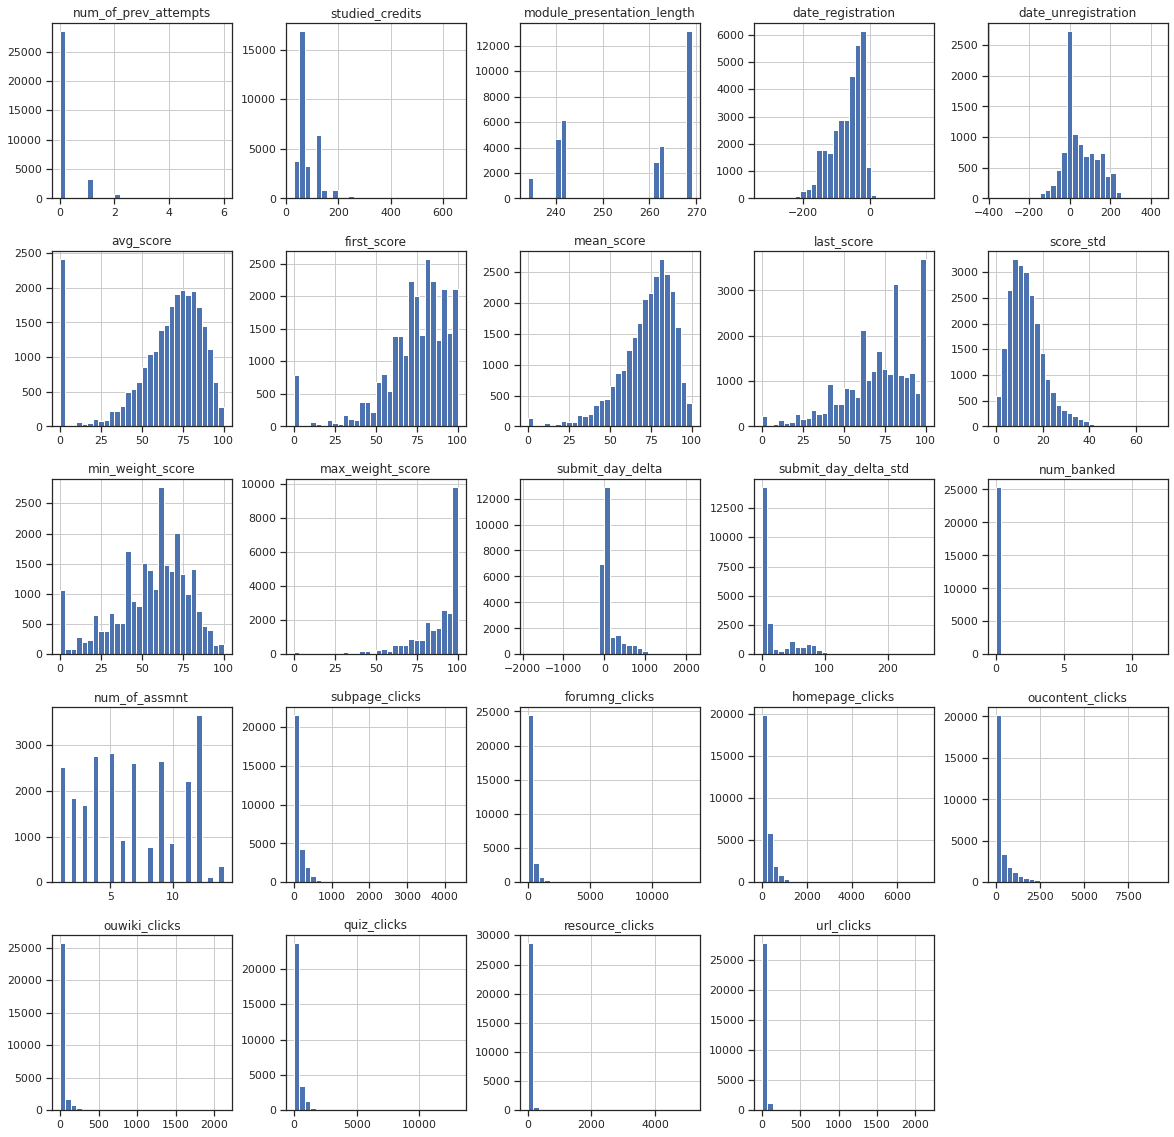

In [11]:
_ = df_cont.hist(bins=30, figsize=(20, 20))

Some features look highly skewed. To have more understanging of them I'll plot their natural logarithm's distribution 

In [12]:
# Features to take log of
log_features = ['submit_day_delta', 'submit_day_delta_std', 'subpage_clicks', 'forumng_clicks', 'homepage_clicks',
 'oucontent_clicks', 'ouwiki_clicks', 'quiz_clicks', 'resource_clicks', 'url_clicks']

At the further steps, I'll need to plot grid plots. The function below will help to reduce the workload

In [13]:
def create_ax_index(nrows,ncols):
  """ 
  *** must be same with first two parameters of plt.subplots***

  Creates an index to be used grid plotting while iterating through 
  the columns of the DataFrame I'll also need to itarate through a list 
  to specifity which column will be plotted on which part of the grid.
  This function creates an index list to be itared together with the DataFrame
  nrows: number of the rows of the grid, 
  ncols number of the columns of the grid,
  """
  
  assert type(nrows) == int, "nrows must be integer"
  assert type(ncols) == int, "ncols must be integer"
  
  size = nrows * ncols
  t = np.zeros((size,2), int)
  slicer = [x for x in range(0,size+1,ncols)] 
  for i in range(0,nrows):
    t[slicer[i]:slicer[i+1], 1] = [x for x in range(ncols)]
    t[slicer[i]:slicer[i+1], 0] = i
    
  return t.tolist()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


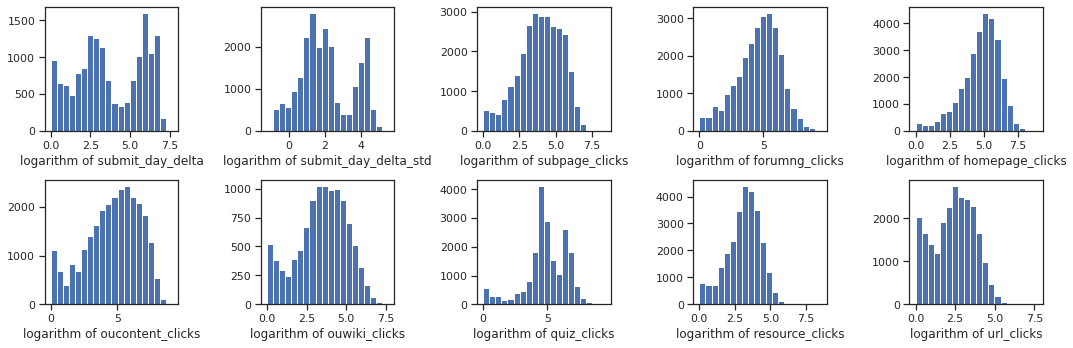

In [14]:
# Set subplot settings 
fig, ax = plt.subplots(2,5,figsize=(15,5))

# Draw each plot with related data and place
for j, col in zip(create_ax_index(2,5), log_features):
  log = np.log(attempts[col])
  ax[j[0],j[1]].hist(log[np.isfinite(log)], bins=20)
  ax[j[0],j[1]].set_xlabel(f'logarithm of {col}')

plt.tight_layout()

Obviously normalizing made the data more interperetable. But for now I will not add them to the table. At the modelling step I might need them or not. So I don't need them until then

## Categorical feature's distributions

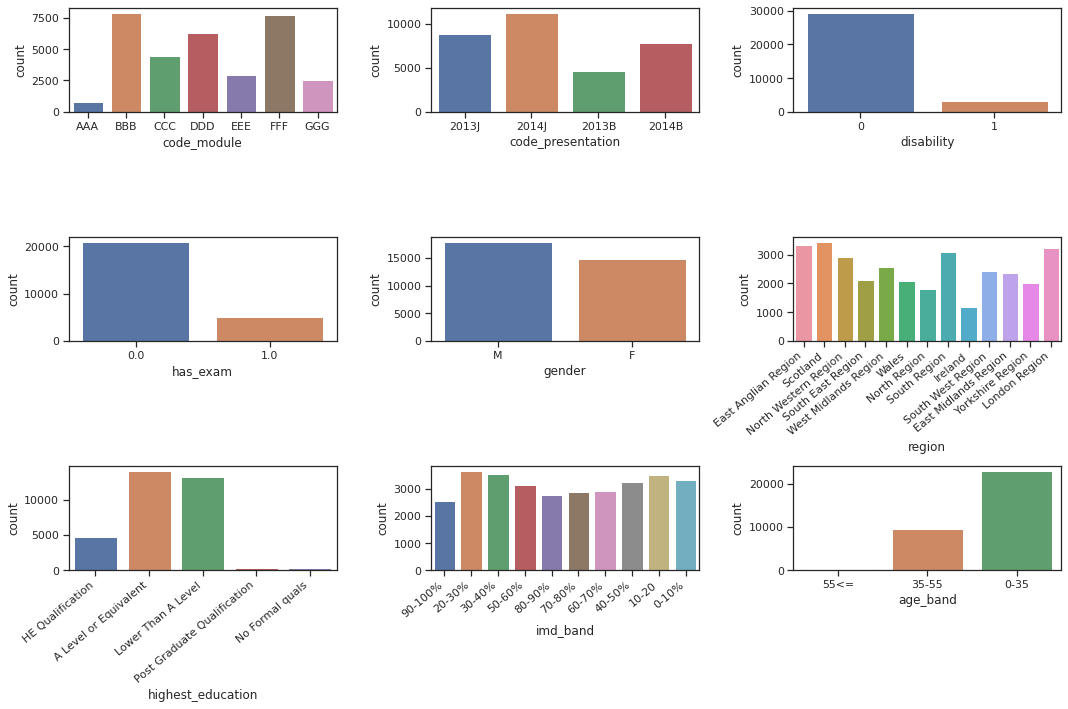

In [15]:
# Set subplot settings 
fig, ax = plt.subplots(3,3, figsize=(15,10))

# Draw each plot with related data and place
for j, col in zip(create_ax_index(3,3), df_cat.columns):
  _ = sns.countplot(x=col, data=df_cat, ax=ax[j[0],j[1]])
  if col in ['region','highest_education', 'imd_band']:
    ax[j[0],j[1]].set_xticklabels(ax[j[0],j[1]].get_xticklabels(), rotation=40, ha="right") 

plt.tight_layout()

For the categorical features there is no obvious distribution. But I wonder how `region`, `highest_education` and `imd_band` effect the target result.

## Reviewing anomalies

Let's have a look if there is an anomalies at the continius anomalies.

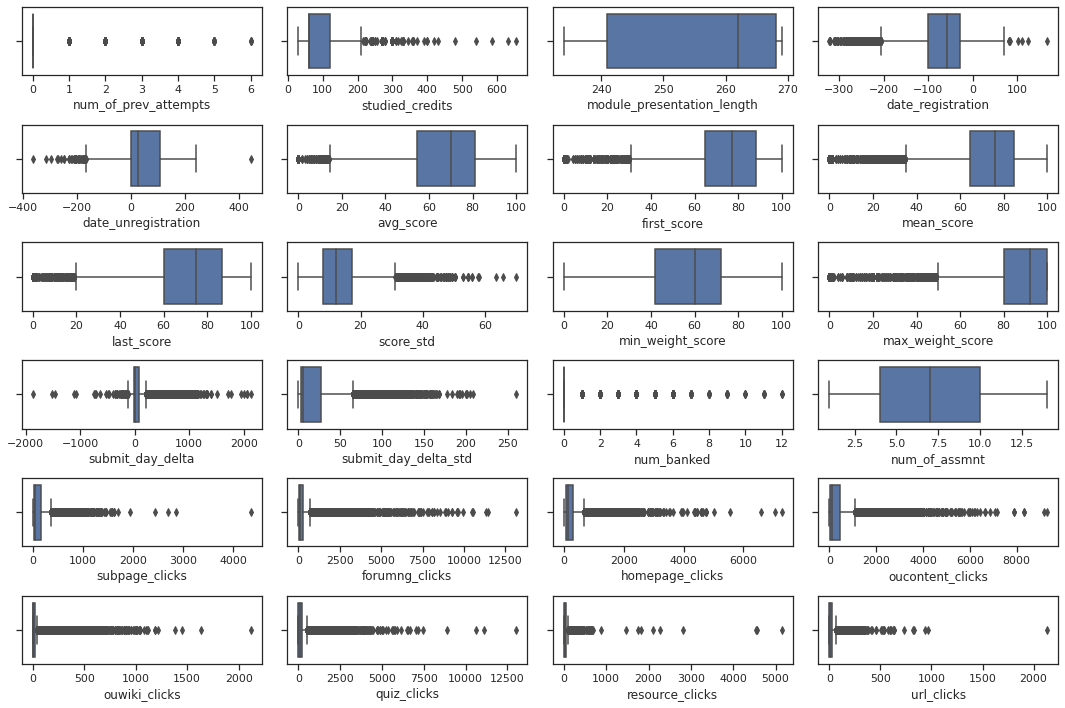

In [16]:
# Set subplot settings 
fig, ax = plt.subplots(6,4, figsize=(15,10))

# Draw each plot with related data and place
for j, col in zip(create_ax_index(6,4), df_cont.columns):
  _ = sns.boxplot(x=col, data=df_cont, ax=ax[j[0],j[1]])

plt.tight_layout()

In [17]:
attempts.num_of_prev_attempts.value_counts()

0    28421
1     3299
2      675
3      142
4       39
5       13
6        4
Name: num_of_prev_attempts, dtype: int64

Nothing specific.

## Data Relationships

How does features affect each other?

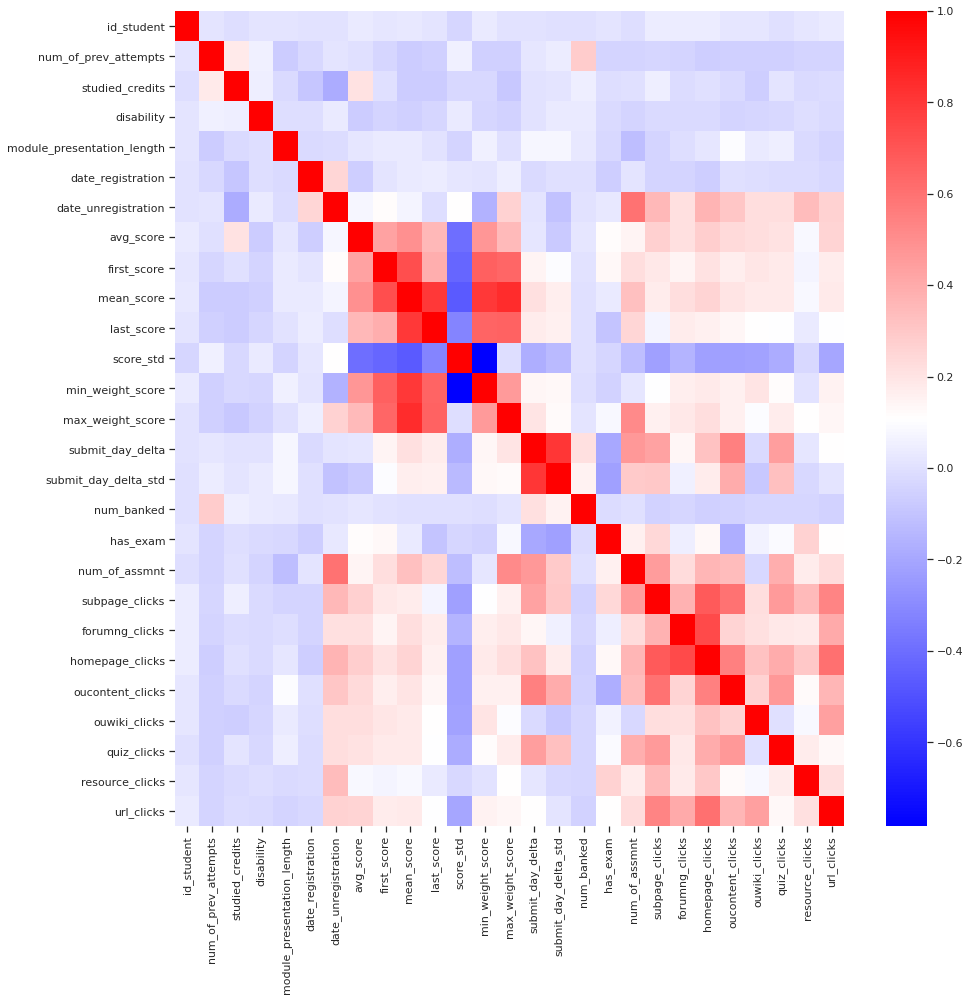

In [18]:
plt.figure(figsize=(15,15))
# mask = (attempts.corr() >= 0.2) | (attempts.corr() <= -0.2))
_ = sns.heatmap(attempts.corr(), cmap='bwr')

There is a certan negative relationship between `score_std` and almost all the other features. So it's worth cheking. Actually, all of score values are worth checking.But keeping in mind that of having redundancy.  
Besides, vle clicks has positive relationship between eachother, so I'll check them too. 

### Score features' relation with `final_result`

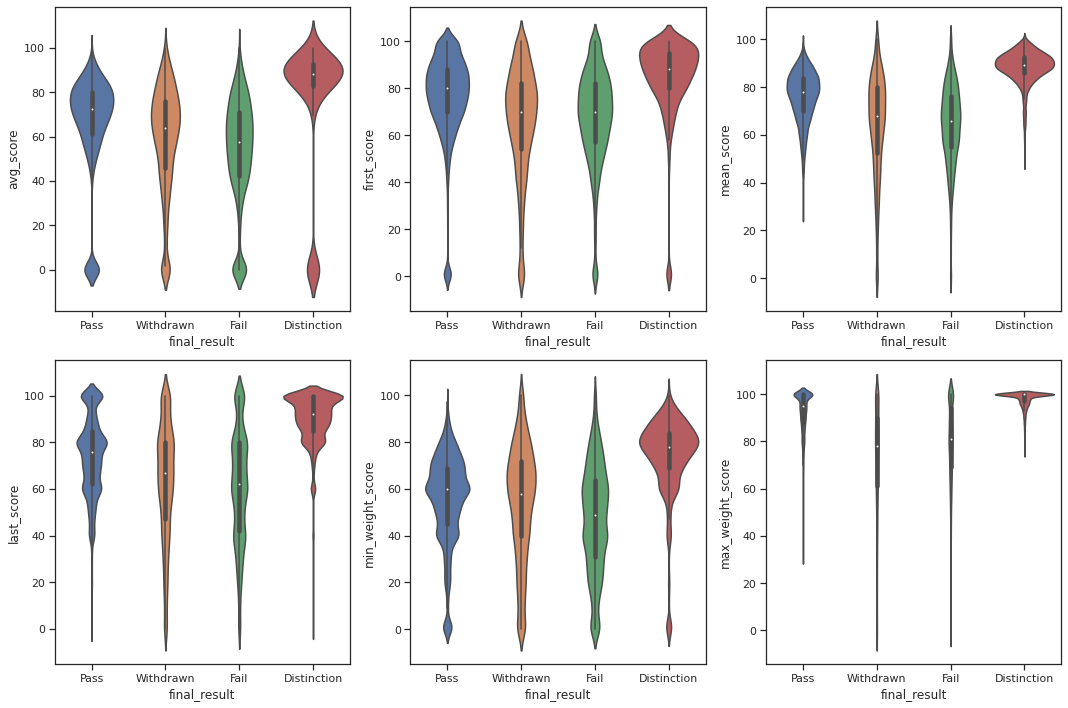

In [19]:
# Set subplot settings 
fig, ax = plt.subplots(2,3, figsize=(15,10))

score_columns = ['avg_score', 'first_score','mean_score', 'last_score', 
                 'min_weight_score', 'max_weight_score']

# Draw each plot with related data and place
for j, col in zip(create_ax_index(2,3), score_columns):
  _ = sns.violinplot(x='final_result', y=col, data=attempts, ax=ax[j[0],j[1]])

plt.tight_layout()

Before moving further, there are some students with `avg_score` below 20 and having a distinction. This doesn't make sense. Let's have deeper look

In [20]:
_below_20_with_distinction = attempts.query("avg_score < 20 & final_result == 'Distinction'").copy()
_below_20_with_distinction.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,date_registration,date_unregistration,avg_score,first_score,mean_score,last_score,score_std,min_weight_score,max_weight_score,submit_day_delta,submit_day_delta_std,num_banked,has_exam,num_of_assmnt,subpage_clicks,forumng_clicks,homepage_clicks,oucontent_clicks,ouwiki_clicks,quiz_clicks,resource_clicks,url_clicks
30059,GGG,2013J,24391,M,East Midlands Region,A Level or Equivalent,80-90%,0-35,0,30,0,Distinction,261,-64.0,NaN,0.0,80.0,88.888889,100.0,10.540926,80.0,100.0,357.0,46.583259,0.0,0.0,9.0,23.0,62.0,130.0,357.0,0.0,120.0,18.0,0.0
30063,GGG,2013J,60405,F,Yorkshire Region,A Level or Equivalent,10-20,35-55,0,30,0,Distinction,261,-123.0,NaN,0.0,78.0,88.666667,100.0,15.524175,60.0,100.0,359.0,46.902677,0.0,0.0,9.0,15.0,127.0,176.0,360.0,0.0,143.0,27.0,0.0
30068,GGG,2013J,82341,F,South East Region,Lower Than A Level,90-100%,0-35,0,30,1,Distinction,261,-73.0,NaN,0.0,60.0,78.571429,100.0,16.761634,60.0,100.0,248.0,50.842427,0.0,0.0,7.0,32.0,52.0,95.0,244.0,0.0,63.0,22.0,0.0
30076,GGG,2013J,129212,F,South Region,Lower Than A Level,80-90%,0-35,0,30,0,Distinction,261,-109.0,NaN,0.0,65.0,82.375000,60.0,16.061823,60.0,100.0,238.0,42.182427,0.0,0.0,8.0,63.0,272.0,298.0,657.0,0.0,93.0,41.0,0.0
30080,GGG,2013J,155256,M,South East Region,A Level or Equivalent,30-40%,0-35,0,30,0,Distinction,261,-24.0,NaN,0.0,70.0,92.222222,100.0,12.275767,70.0,100.0,384.0,49.426713,0.0,0.0,9.0,3.0,42.0,67.0,200.0,0.0,83.0,10.0,0.0


There are 396 entries. Can they all be at the same class?

In [21]:
_below_20_with_distinction['code_module'].unique(), _below_20_with_distinction['code_presentation'].unique()

(array(['GGG'], dtype=object),
 array(['2013J', '2014B', '2014J'], dtype=object))

So, after having a loot at the raw data all of the assignment's weights were 0 for the module GGG. Therefore, for the module GGG `avg_score` and `mean_score` will be the same. So, how replacement will change the distributon and relation with `final_result`? 

In [22]:
_attempts_with_ggg_equlized = attempts.copy()
mask = _attempts_with_ggg_equlized['code_module'].str.contains('GGG')
_attempts_with_ggg_equlized.loc[mask, 'avg_score'] = _attempts_with_ggg_equlized.loc[mask, 'mean_score']

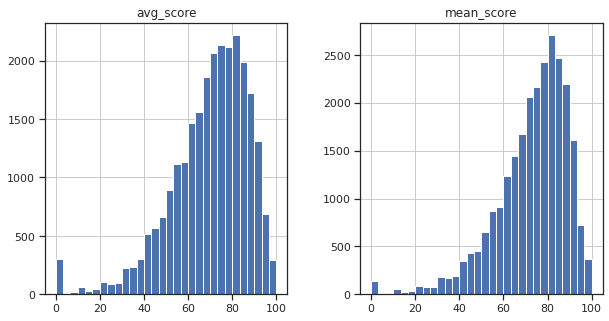

In [23]:
_ = _attempts_with_ggg_equlized[['avg_score', 'mean_score']].hist(bins=30, figsize=(10, 5))

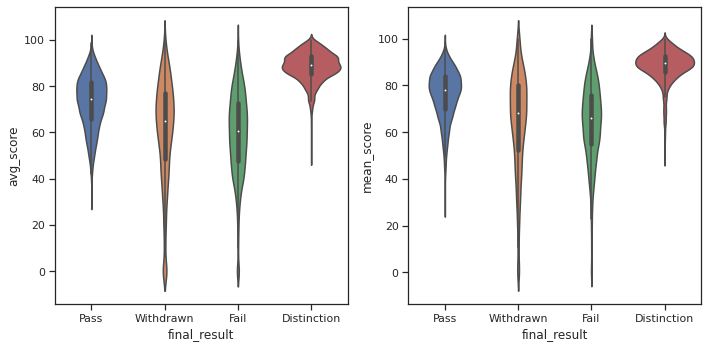

In [24]:
# Set subplot settings 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

_ = sns.violinplot(x='final_result', y='avg_score', data=_attempts_with_ggg_equlized, ax=ax1)
_ = sns.violinplot(x='final_result', y='mean_score', data=_attempts_with_ggg_equlized, ax=ax2)

plt.tight_layout()

With that being corrected the distributions and relations with the `final_result` is pretty much same. Therefore, I won't change anything at the data but ingore the `avg_score` feature

In conclusion, the features I'm going to check is:


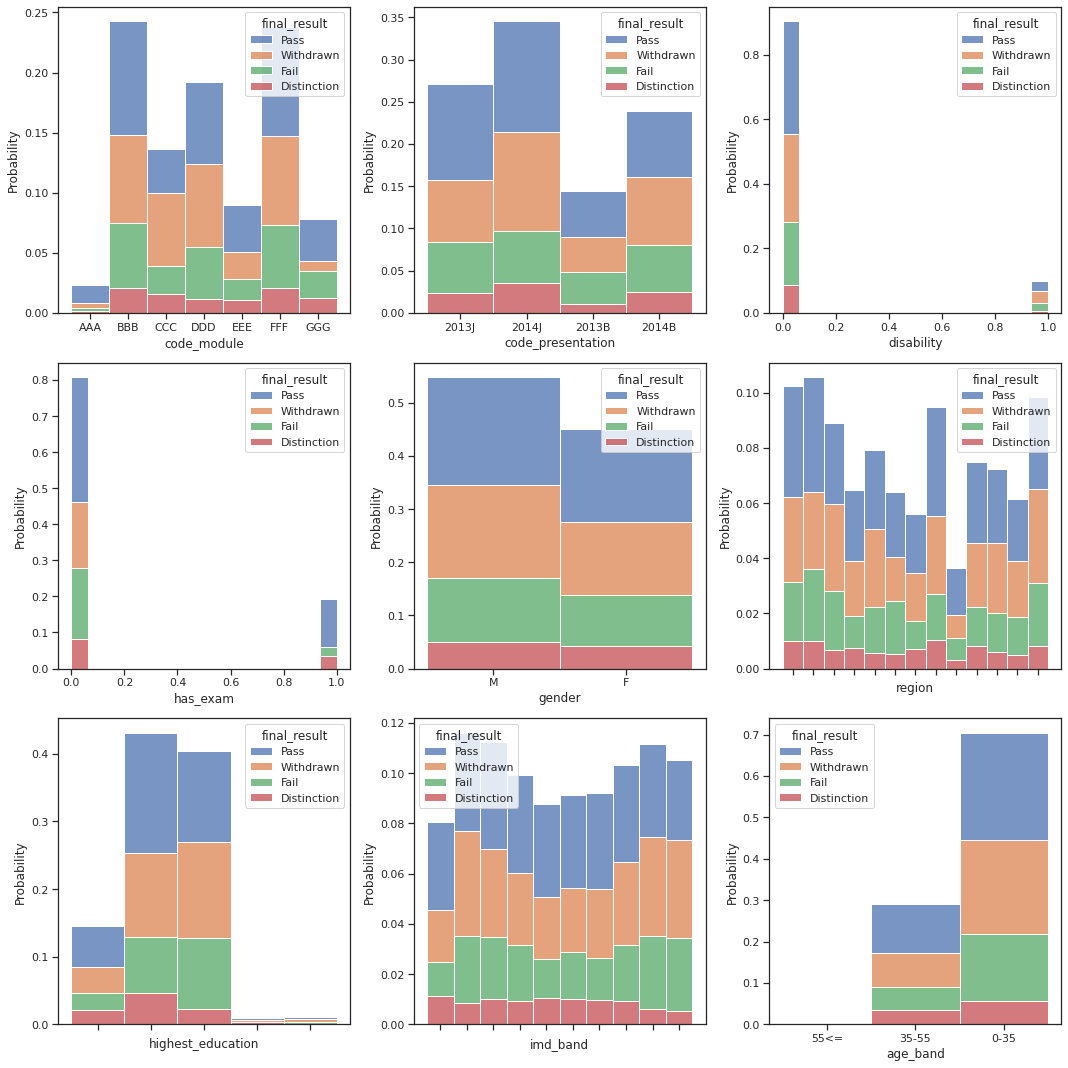

In [25]:
# Set subplot settings 
fig, ax = plt.subplots(3,3, figsize=(15,15))
plt.rc('legend', loc="best")
# Draw each plot with related data and place
for j, col in zip(create_ax_index(3,3), df_cat.columns):
  if col == 'imd_band':
      #     When sns.histplot feed with data containing NaN values, which `imd_band` has,
      #     matplotlib raises a conversion error. 
      #     This issue seems like to be solved in https://github.com/matplotlib/matplotlib/issues/14356
      #     But I was having the error and this is the quickest solution I could come up with

    _ = sns.histplot(x=col, data=attempts[~attempts['imd_band'].isna()], 
                     hue='final_result', multiple='stack', stat='probability',
                     ax=ax[j[0],j[1]])
  else:
    _ = sns.histplot(x=col, data=attempts, hue='final_result', 
                     multiple='stack', stat='probability', ax=ax[j[0],j[1]])
    
  if col in ['region','highest_education', 'imd_band']:
    ax[j[0],j[1]].set_xticklabels(ax[j[0],j[1]].get_xticklabels(), rotation=40, ha="right") 

plt.tight_layout()

Looks like there isn't any specific changes based on the features. But again, I'll have another look on `region`, `highest_education` and `imd_band`

In [26]:
# Calcute the normalized general distribution of final result. To add to the plots 
normalized_general_dist = attempts['final_result'].value_counts() / attempts['final_result'].value_counts().sum()

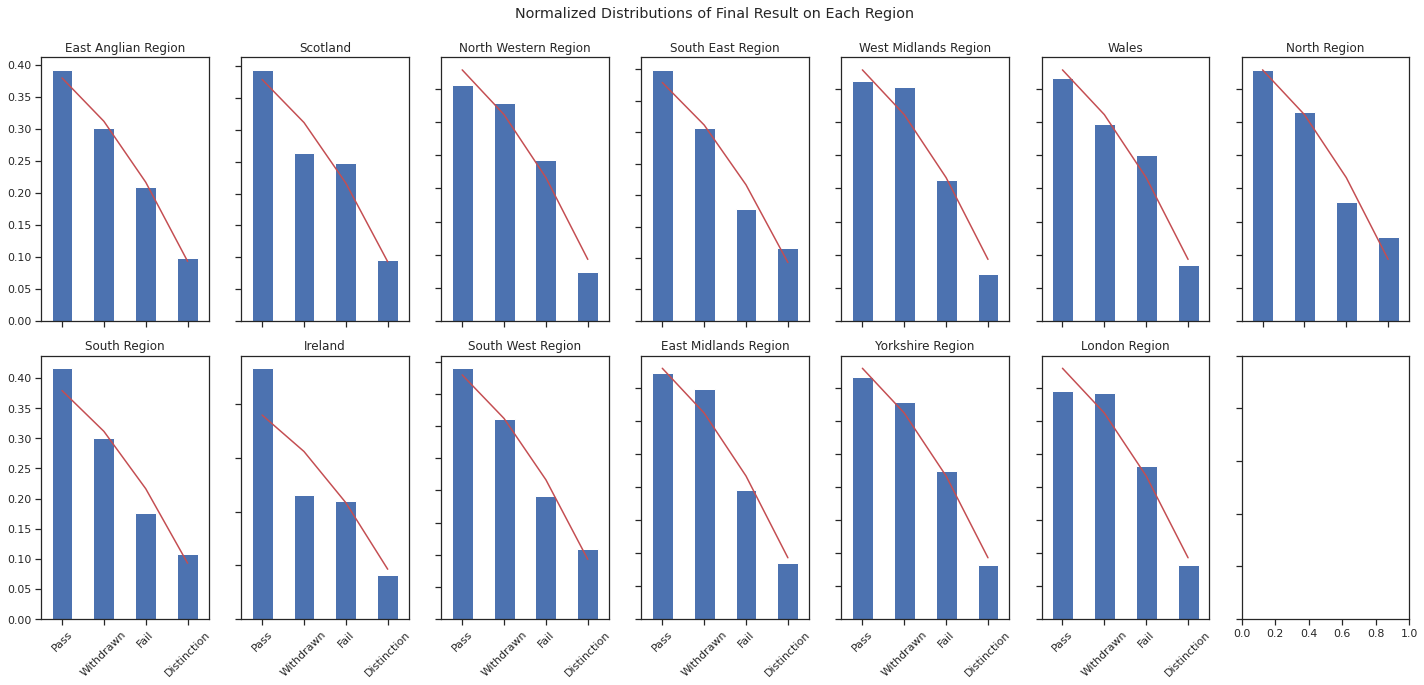

In [27]:
# Plot region-wise distributions of the final result
fig, ax = plt.subplots(2,7, figsize=(20,10))

for j, reg in zip(create_ax_index(2,7), attempts['region'].unique()):
  # Normalize each group in itself
  group = (attempts[attempts['region'] == reg]['final_result']
           .value_counts())
  x = group / group.sum()
  # Plot the group
  x.plot(kind='bar', ax=ax[j[0],j[1]], title=reg, sharex=True, sharey=True, rot=45)
  # Add normalized general plot
  normalized_general_dist.plot(kind='line', ax=ax[j[0],j[1]], color='r', rot=45)
  ax[j[0],j[1]].set_xticklabels(attempts['final_result'].unique()) # Somehow if I don't pass this first two xtick is swapped for the first column of plots

fig.suptitle('Normalized Distributions of Final Result on Each Region')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

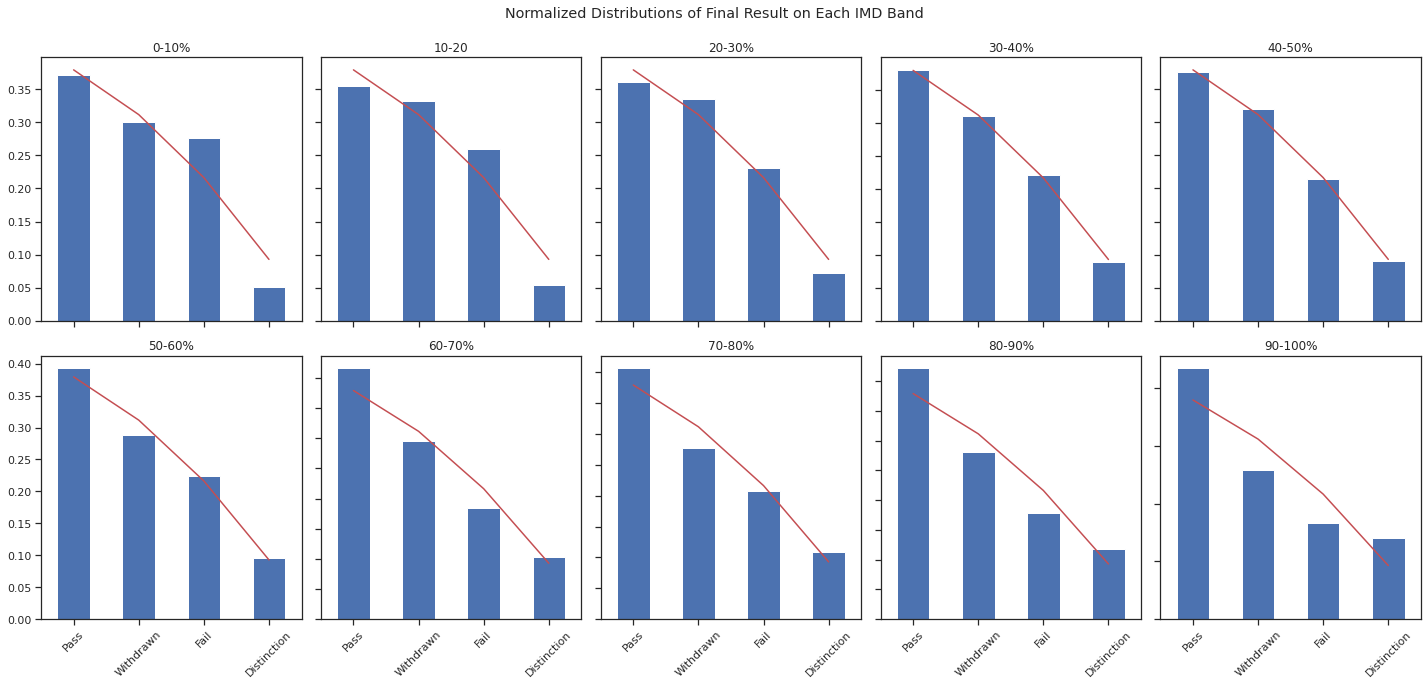

In [28]:
# Plot band-wise distributions of the final result
fig, ax = plt.subplots(2,5, figsize=(20,10))

# Sort the imd_bands to have a more readable plot
sorted_bands = sorted(attempts.loc[~attempts['imd_band'].isna(), 'imd_band'].unique())

for j, imd in zip(create_ax_index(2,5), sorted_bands):
  # Normalize each group in itself
  group = (attempts[attempts['imd_band'] == imd]['final_result']
           .value_counts())
  x = group / group.sum()
  # Plot the group
  x.plot(kind='bar', ax=ax[j[0],j[1]], title=imd, sharex=True, sharey=True, rot=45)
  # Add normalized general plot
  normalized_general_dist.plot(kind='line', ax=ax[j[0],j[1]], color='r', rot=45)
  ax[j[0],j[1]].set_xticklabels(attempts['final_result'].unique()) # Somehow if I don't pass this first two xtick is swapped for the first column of plots

fig.suptitle('Normalized Distributions of Final Result on Each IMD Band')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

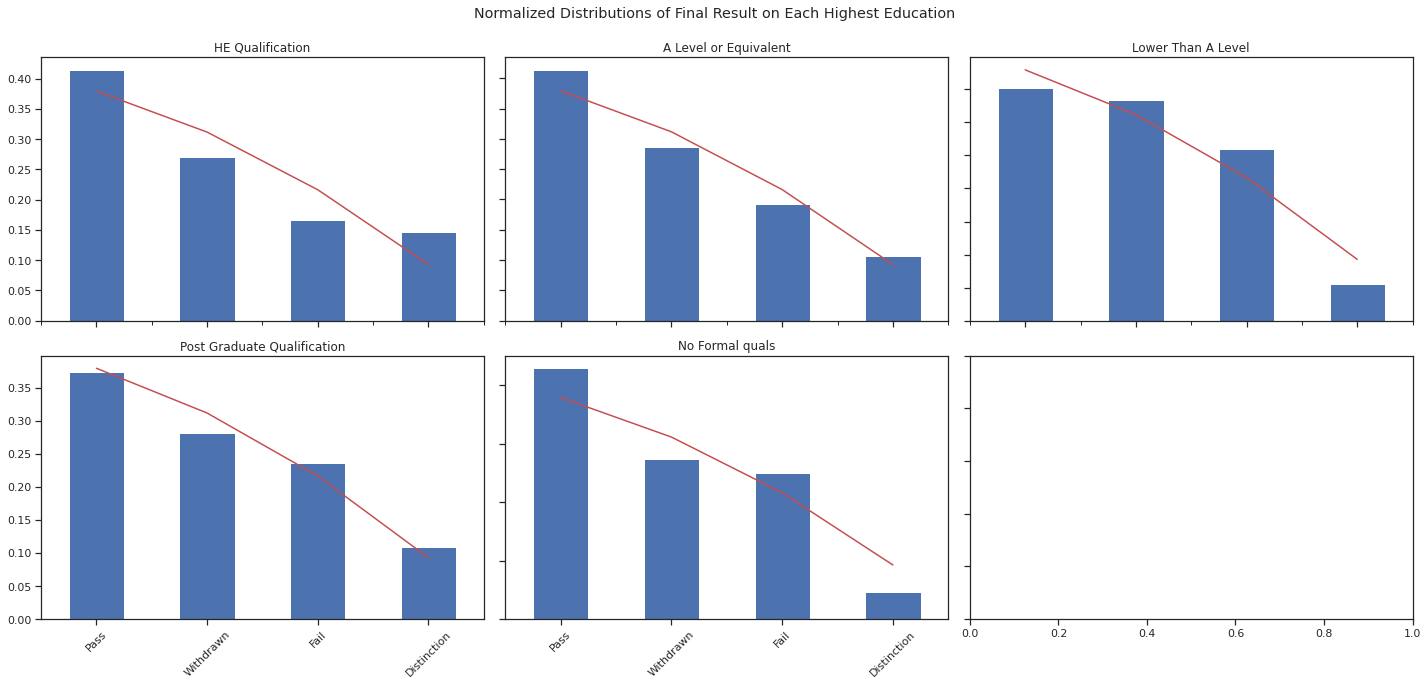

In [29]:
# Plot edicuation-wise distributions of the final result
fig, ax = plt.subplots(2,3, figsize=(20,10))

for j, ed in zip(create_ax_index(2,3), attempts['highest_education'].unique()):
  # Normalize each group in itself
  group = (attempts[attempts['highest_education'] == ed]['final_result']
           .value_counts()) 
  x = group / group.sum()
  # Plot the group
  x.plot(kind='bar', ax=ax[j[0],j[1]], title=ed, sharex=True, sharey=True, rot=45)
  # Add normalized general plot
  normalized_general_dist.plot(kind='line', ax=ax[j[0],j[1]], color='r', rot=45)
  ax[j[0],j[1]].set_xticklabels(attempts['final_result'].unique()) # Somehow if I don't pass this first two xtick is swapped for the first column of plots

fig.suptitle('Normalized Distributions of Final Result on Each Highest Education')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

None of these discrete features has any specific effet on the `final_result`  
  
How about the continuous features 

### First Score

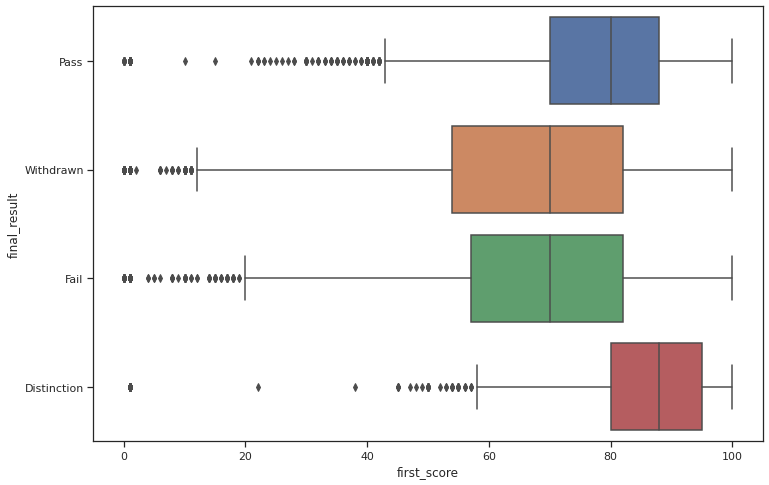

In [30]:
plt.figure(figsize=(12, 8))
plt.rc('legend', loc="upper left")
_ = sns.boxplot(x='first_score', y='final_result', data=attempts)

Does this mean having a first score below 40 highly increases the probability of not passing (and no distiction)?

What is the distributon of first score scales for final result

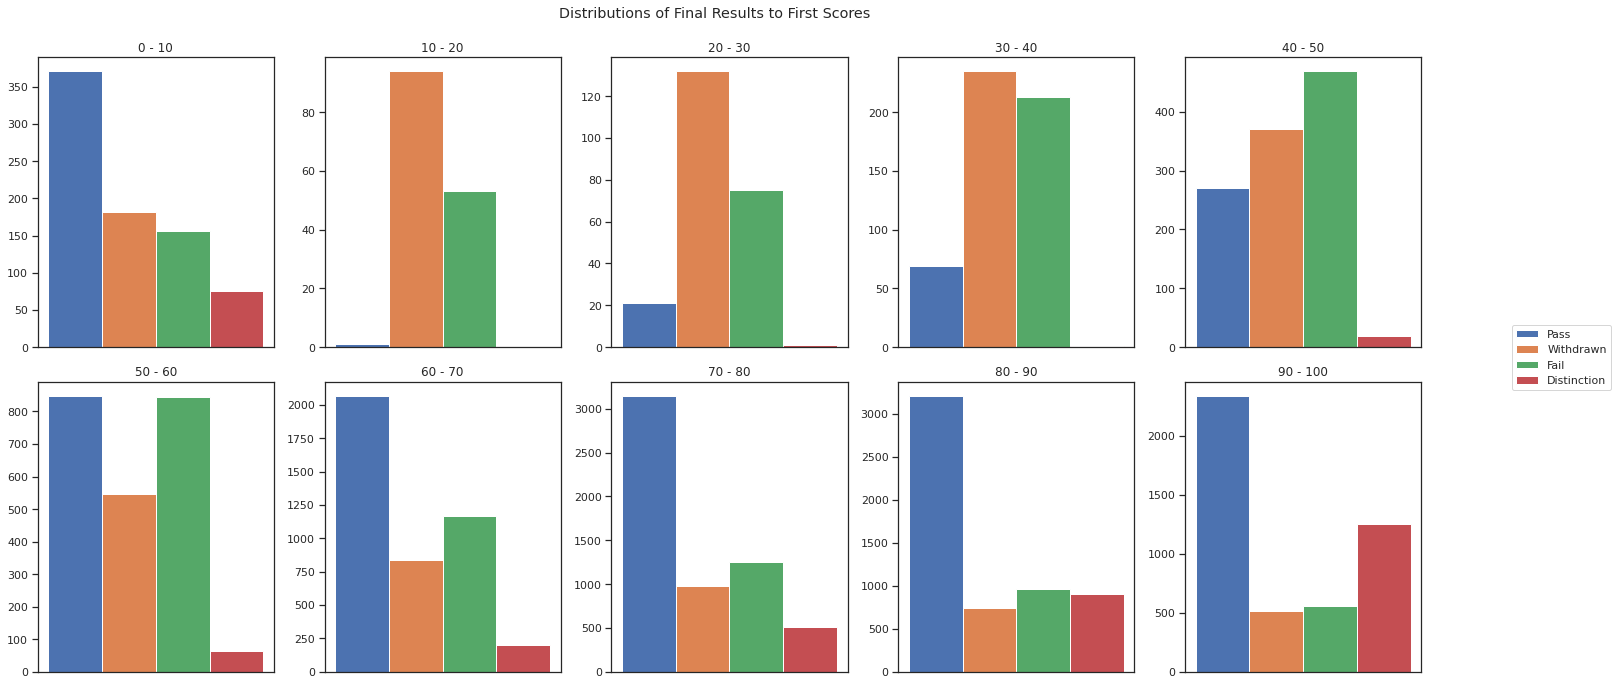

In [31]:
spec = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

fig, ax = plt.subplots(2,5, figsize=(20,10))

x = np.arange(1)  # the label locations
width = [x - 0.75, x - 0.25, x + 0.25, x + 0.75]  # the width of the bars

for j, idx in zip(create_ax_index(2,5), range(1,len(spec))):
  # Loop in the final_result options to plot in a groupped bar
  for i, result_name in enumerate(attempts['final_result'].unique()):
    # Frame the df to one result
    result_df = attempts.query("final_result == @result_name")
    # Get the count of scores inside the spec for the result
    result_count = (result_df.loc[(result_df['first_score'] > spec[idx-1]) & 
                                (result_df['first_score']<= spec[idx]),
                                'first_score']
                            .count())
    # Plot the group for the spec
    ax[j[0], j[1]].bar(width[i], result_count, 0.5, label=result_name)
    ax[j[0], j[1]].set_title(f'{spec[idx-1]} - {spec[idx]}')
    ax[j[0], j[1]].set_xticks([spec[idx]])
    ax[j[0], j[1]].set_xticklabels([spec[idx]])


fig.suptitle("Distributions of Final Results to First Scores")
fig.legend(['Pass', 'Withdrawn', 'Fail', 'Distinction'], bbox_to_anchor=(1.05, 0.5), loc='upper left', borderaxespad=0.)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Obviously `first_score` has an effect on the target feature. Is this is a result of a randomness.

#### Permutation test for first score
$H_0$: First score has no effect on final result

In [32]:
def shuffle(df, n=1, axis=0):     
  df = df.copy()
  for _ in range(n):
    df.apply(np.random.shuffle, axis=axis)
  return df

In [ ]:
spec = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
permutation_sample = pd.DataFrame(columns=['final_result', 'first_score_mean'])
samp = []
for idx in range(1, len(spec)):
  for i in range(1):
    shf = shuffle(attempts[['final_result', 'first_score']], 1)
    for i, result_name in enumerate(shf['final_result'].unique()):
      # Frame the df to one result
      result_df = shf.query("final_result == @result_name")
      # Get the count of scores inside the spec for the result
      result_mean = (result_df.loc[(result_df['first_score'] > spec[idx-1]) & 
                                  (result_df['first_score']<= spec[idx]),
                                  'first_score']
                              .mean())
      
      samp.append([result_name, result_mean])

In [198]:
samp

,final_result,first_score_mean


### Mean Score

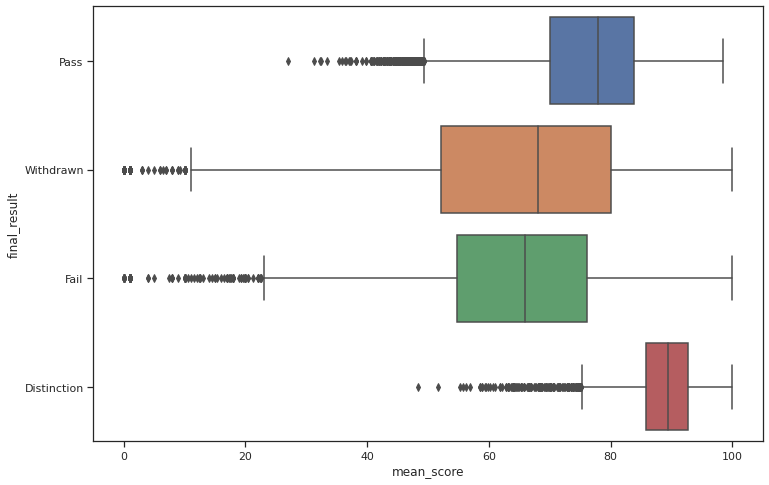

In [33]:
plt.figure(figsize=(12,8))
_ = sns.boxplot(x='mean_score', y='final_result', data=attempts)

Withdrawn has more spread than fail. And both fail and withdrawn overlaps with pass. How could having same mean_scores will lead to one attempt to pass and the other one to fail

In [34]:
class_avg = attempts.groupby(['code_module', 'code_presentation']).mean('mean_score')['mean_score']
class_avg.head(3)

code_module  code_presentation
AAA          2013J                68.694872
             2014J                67.847794
BBB          2013B                77.173996
Name: mean_score, dtype: float64

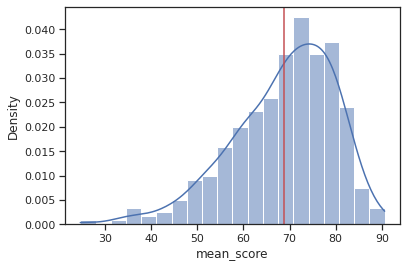

In [35]:
_ = sns.histplot(x='mean_score',
                 bins=20,
                 kde=True,
                 stat='density',
                data=attempts[
                              (attempts['code_module'] == 'AAA') & 
                              (attempts['code_presentation'] == '2013J')])

_ = plt.axvline(class_avg.loc['AAA','2013J'], color='r')

# Summray